# Importando as bibliotecas

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plot

import math
import matplotlib as mpl



## 2. Baixando as imagens para trabalharmos com realce 

In [2]:
!wget https://www.dropbox.com/sh/ebjehq74jdj0522/AAC045Pq_5OB0RPuj9rmyFIla
!unzip AAC045Pq_5OB0RPuj9rmyFIla

--2022-05-16 00:55:58--  https://www.dropbox.com/sh/ebjehq74jdj0522/AAC045Pq_5OB0RPuj9rmyFIla
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ebjehq74jdj0522/AAC045Pq_5OB0RPuj9rmyFIla [following]
--2022-05-16 00:55:58--  https://www.dropbox.com/sh/raw/ebjehq74jdj0522/AAC045Pq_5OB0RPuj9rmyFIla
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca9ae59e47b219c2af335ec244d.dl.dropboxusercontent.com/zip_download_get/BIsc02F5JSkbm7vcBqKGlzvS7enDygudZml1bMpq1VGNoGBZJRPhplotRDu4EpSYkWTBwp1Ce9ZhtZlmiGn-D5GfvEO7Rm2RwWmB2_2UXNAmfA# [following]
--2022-05-16 00:55:59--  https://uca9ae59e47b219c2af335ec244d.dl.dropboxusercontent.com/zip_download_get/BIsc02F5JSkbm7vcBqKGlzvS7enDygudZml1bMpq1VGNoGBZJRPhplotRDu4EpSYkWTBwp1Ce9ZhtZlmiGn

## 3. Funções auxiliares para mostrar alguns gráficos didáticos

In [3]:
def plotarImagensHistogramas(imgEntrada, imgSaida):
  fig, ax = plot.subplots(2, 2, figsize=(15,10))
  fig.subplots_adjust(hspace=0.5)
  
  histEntrada, _ = np.histogram(imgEntrada, bins=256, range=(0, 255))
  histSaida, _ = np.histogram(imgSaida, bins=256, range=(0, 255))

  ax[0, 0].imshow(cv.cvtColor(imgEntrada, cv.COLOR_GRAY2RGB), extent=(0, 100, 0, 80))
  ax[0, 1].plot(histEntrada)
  ax[1, 0].imshow(cv.cvtColor(imgSaida, cv.COLOR_GRAY2RGB), extent=(0, 100, 0, 80))
  ax[1, 1].plot(histSaida)




# Função para criar o histograma, histograma relativo e histograma relativo acumulado

In [4]:
def criarHistograma(img):
    quantLinhas = np.size(img, 0)
    quantColunas = np.size(img, 1)
    
    #calculando o histograma
    H = np.zeros(256)
    for linha in range(quantLinhas):
        for coluna in range(quantColunas):
            i = img[linha, coluna]
            H[ i ] += 1
    
    #calculando o histograma relativo
    Hr = np.zeros(256)
    N = (quantLinhas * quantColunas)
    for i in range(256):
        Hr[i] = H[i] / N

    #calculando o histograma relativo acumulado
    Hra = np.zeros(256)
    Hra[0] = Hr[0]
    for i in range(1, 256):
        Hra[i] = Hra[i-1] + Hr[i]

    
    return (H, Hr, Hra)

# Função para equalizar a imagem

- Calcule o histograma da imagem: H
- Calcule o Histograma relativo: Hr
- Calcule o Histograma relativo acumulado Hra
- Calcule a equalização:
Para cada nível de cinza $i \in [0, 1, ..., 255]$, calcule: 
$$Eq[i] = 255 \times Hra[i]$$
- Aplique a equalização na imagem, isto é: 
 - para cada linha e coluna, faça: 
   - ``i = imgEntrada[linha][coluna]`` 
   - ``imgSaida[linha][coluna] = Eq[i]``


In [ ]:
def equalizarImagem(imgEntrada):
  quantLinhas = np.size(imgEntrada, 0)
  quantColunas = np.size(imgEntrada, 1)
  
  imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8')

  #inicio
  (H, Hr, Hra) = criarHistograma(imgEntrada)

  Eq = np.zeros(256)
  for i in range(256):
    Eq[i] = math.ceil( 255 * Hra[i] ) #o resultado está sendo arredondado

  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      
      nivelCinza = imgEntrada[linha][coluna]

      novoNivelCinza = Eq[ nivelCinza ]

      imgSaida[linha][coluna] = novoNivelCinza

  #fim
  return imgSaida


# Aplicação dos métodos de realce em uma imagem

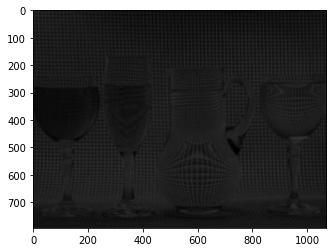

In [ ]:
imgEntrada = cv.imread("tacas.png", cv.IMREAD_GRAYSCALE)

plot.imshow(imgEntrada, vmax=255, vmin=0, cmap='gray')

# Plotando o histograma da imagem e o histograma acumulado

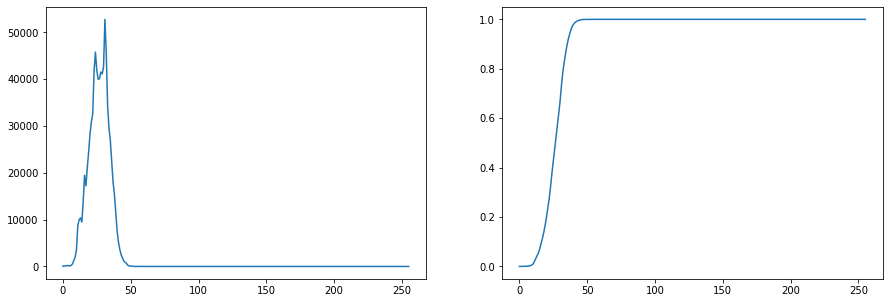

In [ ]:
(H, Hr, Hra) = criarHistograma(imgEntrada)

fig, ax = plot.subplots(1, 2, figsize=(15,5))
ax[0].plot(H)
ax[1].plot(Hra)

# Aplicação da equalização

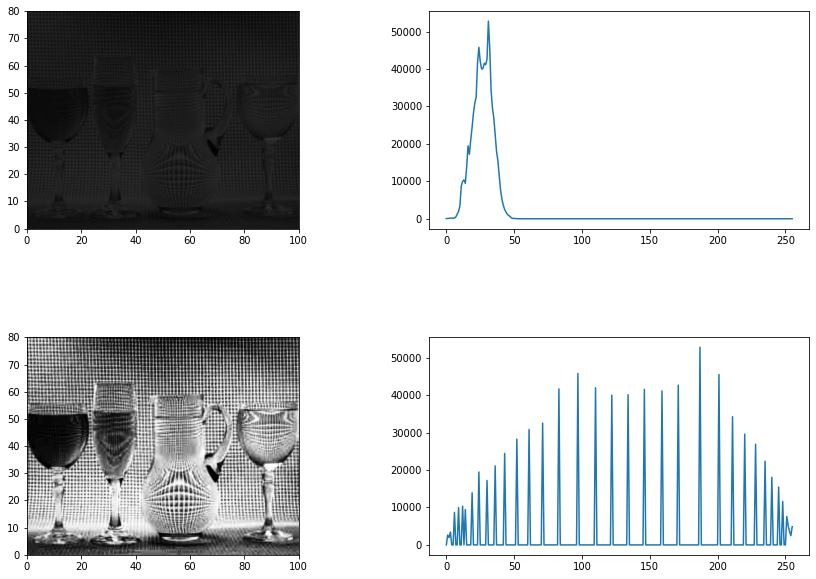

In [ ]:
imgSaida = equalizarImagem(imgEntrada)
plotarImagensHistogramas(imgEntrada, imgSaida)

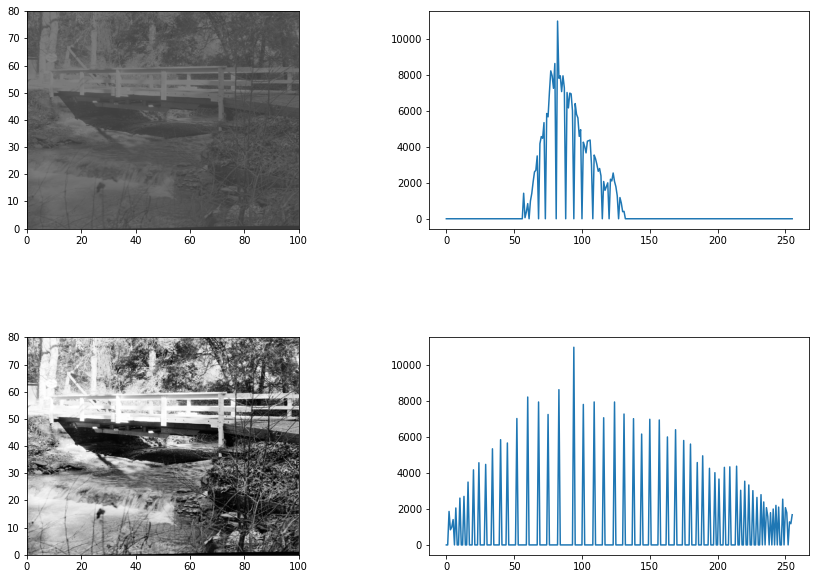

In [ ]:
imgEntrada = cv.imread("bridge.png", cv.IMREAD_GRAYSCALE)

imgSaida = equalizarImagem(imgEntrada)
plotarImagensHistogramas(imgEntrada, imgSaida)

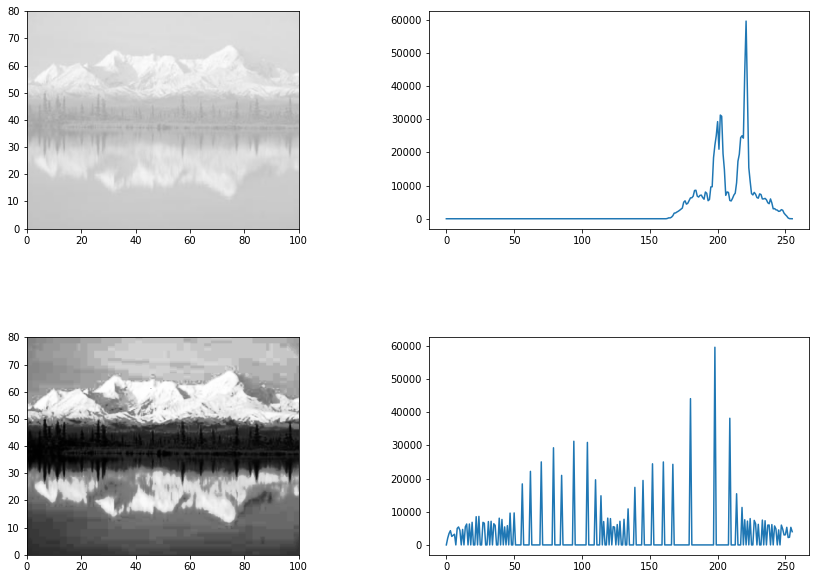

In [ ]:
imgEntrada = cv.imread("montanhas.png", cv.IMREAD_GRAYSCALE)

imgSaida = equalizarImagem(imgEntrada)
plotarImagensHistogramas(imgEntrada, imgSaida)

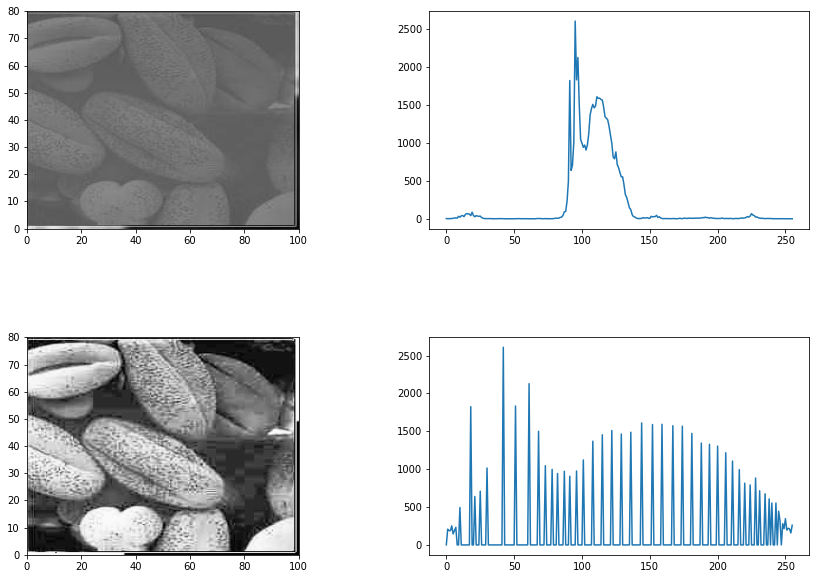

In [ ]:
imgEntrada = cv.imread("polen.jpg", cv.IMREAD_GRAYSCALE)

imgSaida = equalizarImagem(imgEntrada)
plotarImagensHistogramas(imgEntrada, imgSaida)

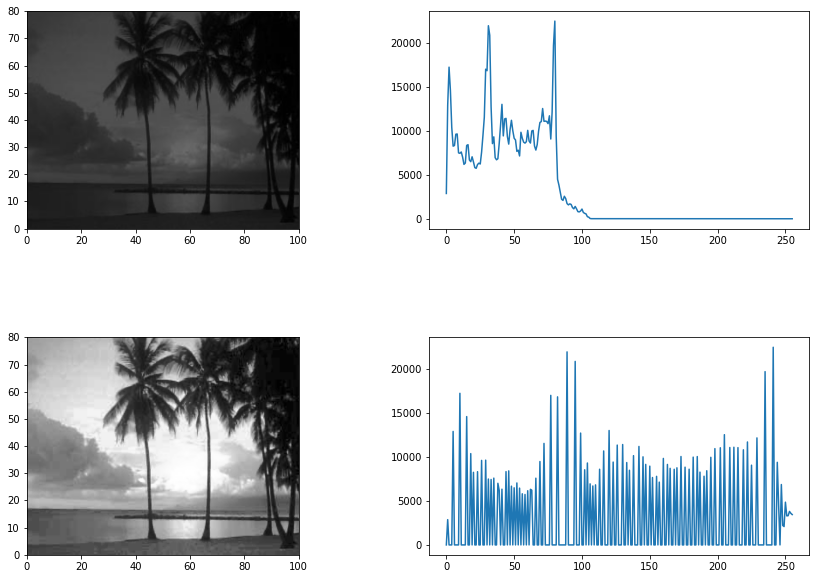

In [ ]:
imgEntrada = cv.imread("praia.png", cv.IMREAD_GRAYSCALE)

imgSaida = equalizarImagem(imgEntrada)
plotarImagensHistogramas(imgEntrada, imgSaida)

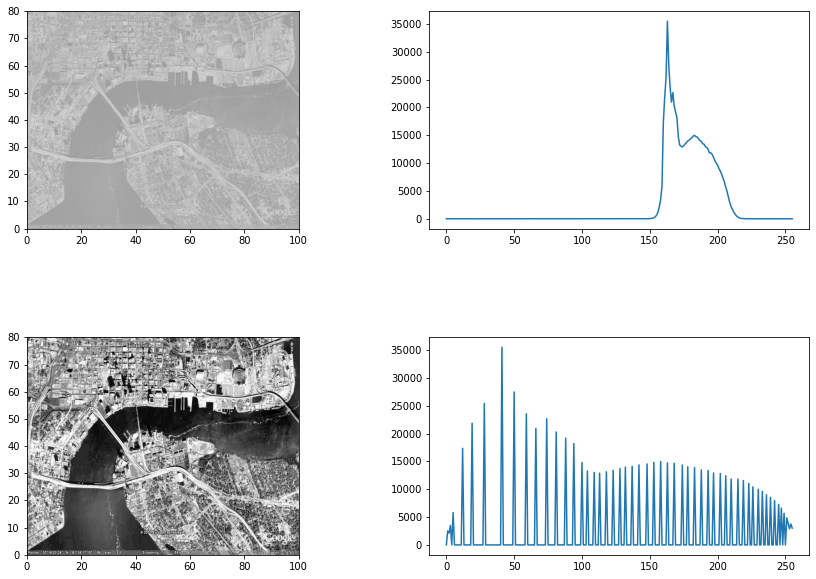

In [ ]:
imgEntrada = cv.imread("satelite.jpg", cv.IMREAD_GRAYSCALE)

imgSaida = equalizarImagem(imgEntrada)
plotarImagensHistogramas(imgEntrada, imgSaida)

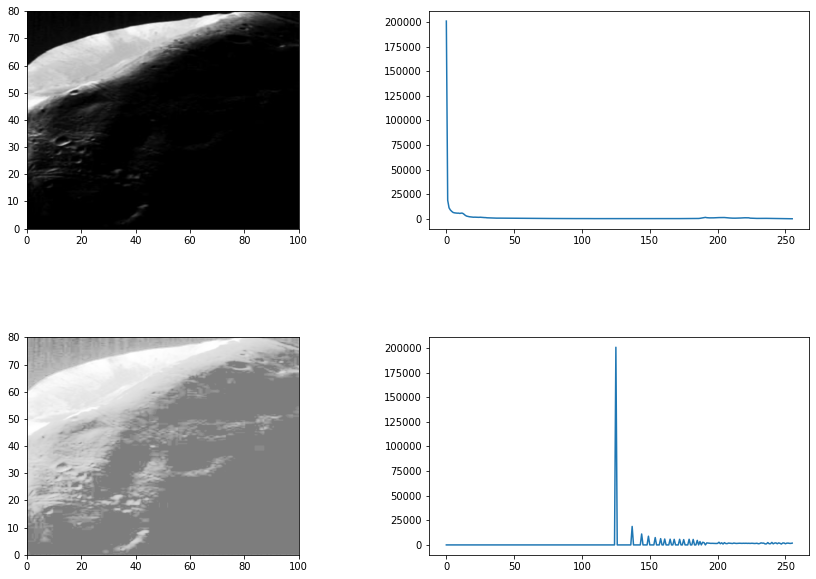

In [ ]:
imgEntrada = cv.imread("teste.png", cv.IMREAD_GRAYSCALE)

imgSaida = equalizarImagem(imgEntrada)
plotarImagensHistogramas(imgEntrada, imgSaida)

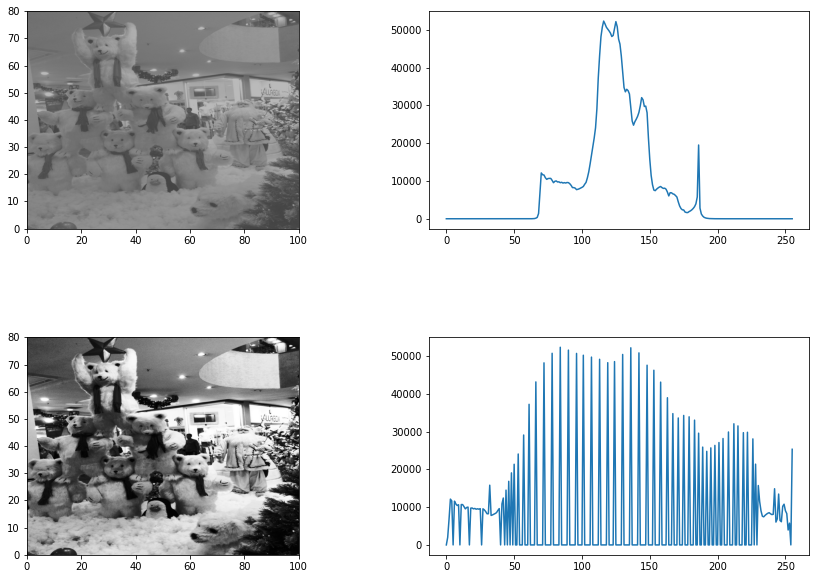

In [ ]:
imgEntrada = cv.imread("ursos.jpg", cv.IMREAD_GRAYSCALE)

imgSaida = equalizarImagem(imgEntrada)
plotarImagensHistogramas(imgEntrada, imgSaida)

# Para seu exercício use o código modelo abaixo mas antes siga as seguintes instruções:
1. Crie um novo arquivo jupyter notebook
2. Implemente a célula para importar as bibliotecas e baixar as imagens

3. Para cada imagem da pasta **imagem_realce**, crie uma nova célula e aplique equalização do histograma
  - 3.1 Utilize o código modelo abaixo para aplicar o realce 

4. Teste com imagens coloridas


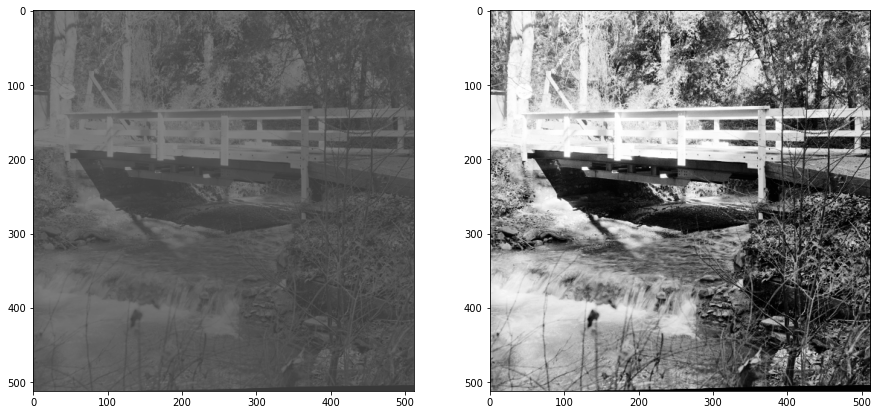

In [ ]:
#abrindo uma imagem
imgEntrada = cv.imread("bridge.png", cv.IMREAD_GRAYSCALE)

#criando a estrutura da imagem de saida
quantLinhas = np.size(imgEntrada, 0)
quantColunas = np.size(imgEntrada, 1)
imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8')


#criando o mapeamento das intensidade da imagem para as intensidades equalizadas
(H, Hr, Hra) = criarHistograma(imgEntrada)
Eq = np.zeros(256)
for i in range(256):
  Eq[i] = 255 * Hra[i]


#aplicar o novo re-mapeamentos das cores
for linha in range(quantLinhas):
  for coluna in range(quantColunas):
    i = imgEntrada[linha][coluna] #valor antigo
    imgSaida[linha, coluna] = Eq[ i ]


#exibir as duas imagem: entrada e saida
fig, (plot1, plot2) = plot.subplots(1, 2, figsize=(15,25))
plot1.imshow( cv.cvtColor(imgEntrada, cv.COLOR_GRAY2RGB), label="Entrada" )
plot2.imshow( cv.cvtColor(imgSaida, cv.COLOR_GRAY2RGB) )

In [ ]:
!wget https://i.stack.imgur.com/KT6av.png
!wget https://img.freepik.com/fotos-gratis/um-farol-de-navegacao-maritima-ergue-se-da-neblina-vista-panoramica-o-farol-sinaliza-em-condicoes-de-visibilidade-limitada_183270-1247.jpg
!wget https://img.freepik.com/fotos-gratis/fundo-decorativo-de-baixo-contraste-com-lampadas-multicoloridas-na-superficie_183270-831.jpg
!wget https://claudiaarcatic1.files.wordpress.com/2018/06/poco-contraste.jpg

--2022-05-13 00:51:32--  https://i.stack.imgur.com/KT6av.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.36.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288759 (282K) [image/png]
Saving to: ‘KT6av.png.3’

KT6av.png.3         100%[===================>] 281.99K  --.-KB/s    in 0.04s   

2022-05-13 00:51:32 (7.24 MB/s) - ‘KT6av.png.3’ saved [288759/288759]

--2022-05-13 00:51:32--  https://img.freepik.com/fotos-gratis/um-farol-de-navegacao-maritima-ergue-se-da-neblina-vista-panoramica-o-farol-sinaliza-em-condicoes-de-visibilidade-limitada_183270-1247.jpg
Resolving img.freepik.com (img.freepik.com)... 23.64.61.148, 2600:1403:9c00:d91::30ec, 2600:1403:9c00:d8a::30ec
Connecting to img.freepik.com (img.freepik.com)|23.64.61.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11386 (11K) [image/jpeg]
Saving to: ‘um-farol-de-navegacao-maritima-ergue-se-da-ne

#Equalização para imagens coloridas

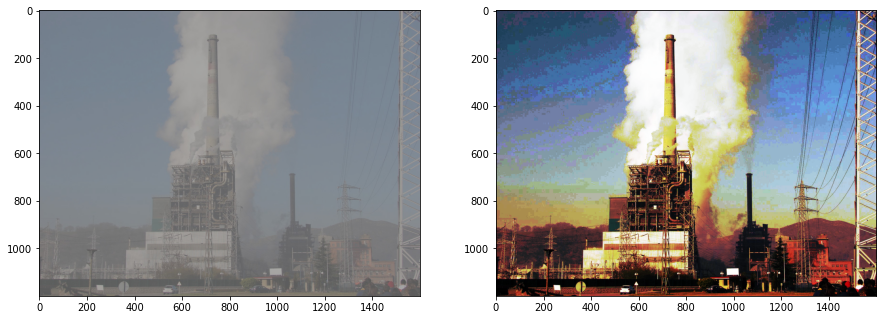

In [ ]:
imgEntrada = cv.imread("poco-contraste.jpg")

quantLinhas = np.size(imgEntrada, 0)
quantColunas = np.size(imgEntrada, 1)

imgSaida = np.zeros( (quantLinhas, quantColunas, 3), dtype="uint8")


for banda in range(3):
  #construindo os histogramas em uma banda espectral (ou seja, RGB) por vez 
  (H, Hr, Hra) = criarHistograma(imgEntrada[:,:, banda])
  Eq = np.zeros(256)
  for i in range(256):
    Eq[i] = 255 * Hra[i] #Histograma equalizado

  #Aplicando a equalização em banda espectral por vez
  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      valorAntigo = imgEntrada[linha, coluna, banda]
      valorNovo = Eq[valorAntigo]
      imgSaida[linha, coluna, banda] = valorNovo



#exibir as duas imagem: entrada e saida
fig, (plot1, plot2) = plot.subplots(1, 2, figsize=(15,25))
plot1.imshow( cv.cvtColor(imgEntrada, cv.COLOR_BGR2RGB), label="Entrada" )
plot2.imshow( cv.cvtColor(imgSaida, cv.COLOR_BGR2RGB) )

In [5]:
from IPython.display import display, Javascript
from IPython.display import Image
from google.colab.output import eval_js
from base64 import b64decode

#função para habilitar a webcam
def tirarFoto(quality=0.8):
  js = Javascript('''
    async function tirarFoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Tirar foto';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      
      return canvas.toDataURL('image/jpeg', quality);
      
    }
    ''')
  
  display(js)
  data = eval_js('tirarFoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])

  np_arr = np.frombuffer(binary, dtype=np.uint8)
  return cv.imdecode(np_arr, cv.IMREAD_COLOR)


<IPython.core.display.Javascript object>

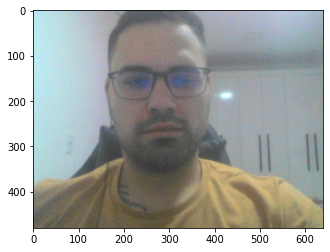

In [6]:
minhaImagem = tirarFoto()

#aplicar a equalização na imagem...

plot.imshow( cv.cvtColor(minhaImagem, cv.COLOR_BGR2RGB), label="Entrada" )


<IPython.core.display.Javascript object>

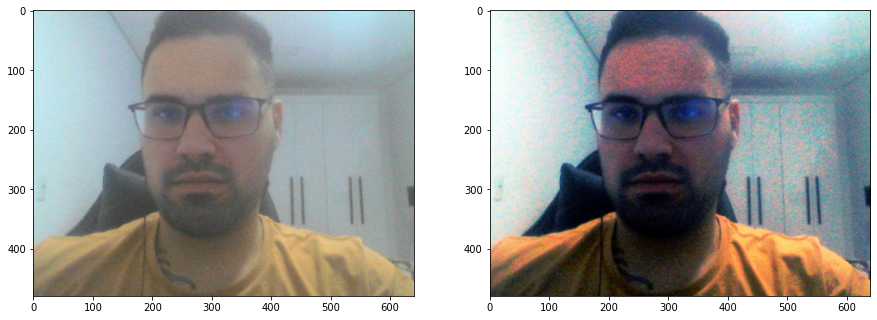

In [7]:
imgEntrada = tirarFoto()

quantLinhas = np.size(imgEntrada, 0)
quantColunas = np.size(imgEntrada, 1)

imgSaida = np.zeros( (quantLinhas, quantColunas, 3), dtype="uint8")


for banda in range(3):
  #construindo os histogramas em uma banda espectral (ou seja, RGB) por vez 
  (H, Hr, Hra) = criarHistograma(imgEntrada[:,:, banda])
  Eq = np.zeros(256)
  for i in range(256):
    Eq[i] = 255 * Hra[i] #Histograma equalizado

  #Aplicando a equalização em banda espectral por vez
  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      valorAntigo = imgEntrada[linha, coluna, banda]
      valorNovo = Eq[valorAntigo]
      imgSaida[linha, coluna, banda] = valorNovo



#exibir as duas imagem: entrada e saida
fig, (plot1, plot2) = plot.subplots(1, 2, figsize=(15,25))
plot1.imshow( cv.cvtColor(imgEntrada, cv.COLOR_BGR2RGB), label="Entrada" )
plot2.imshow( cv.cvtColor(imgSaida, cv.COLOR_BGR2RGB) )